In [51]:
from keras.datasets.mnist import load_data

In [52]:
(x_train, y_train), (x_test, y_test) = load_data()

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
x_test.shape

(10000, 28, 28)

In [55]:
y_train.shape

(60000,)

In [56]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
sample_size=3
random_idx = np.random.randint(60000,size=sample_size)
random_idx

array([21133, 32526,    30])

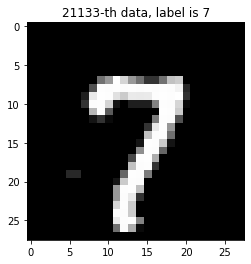

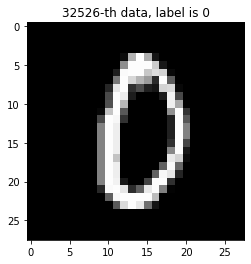

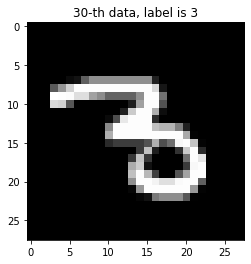

In [59]:
for idx in random_idx:
  img = x_train[idx,:]
  label = y_train[idx]
  plt.imshow(img,cmap='gray')
  plt.title(f'{idx}-th data, label is {label}')
  plt.show()

In [61]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_val,y_train,y_val = train_test_split(x_train,
                                               y_train,
                                               test_size=0.3,
                                               random_state=777)
print(x_train.shape,y_train.shape)

(42000, 28, 28) (42000,)


In [65]:
x_train = (x_train.reshape((-1,28*28)))/255

In [66]:
x_train.shape

(42000, 784)

In [70]:
x_train.min(),x_train.max()

(0.0, 1.0)

In [71]:
x_val = (x_val.reshape((-1,28*28)))/255
x_test = (x_test.reshape((-1,28*28)))/255

In [72]:
from keras.utils import to_categorical

In [73]:
# 원핫 인코딩
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [74]:
from keras.models import Sequential
from keras.layers import Dense

In [75]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [76]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [77]:
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4984 - acc: 0.8614 - val_loss: 0.2529 - val_acc: 0.9249
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.2121 - acc: 0.9399 - val_loss: 0.2022 - val_acc: 0.9412
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1635 - acc: 0.9532 - val_loss: 0.1629 - val_acc: 0.9517
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1343 - acc: 0.9615 - val_loss: 0.1528 - val_acc: 0.9557
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1139 - acc: 0.9666 - val_loss: 0.1346 - val_acc: 0.9608
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0985 - acc: 0.9712 - val_loss: 0.1273 - val_acc: 0.9614
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0838 - acc: 0.9754 - val_loss: 0.1200 - val_acc: 0.9631
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

In [24]:
history

In [78]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [79]:
import matplotlib.pyplot as plt

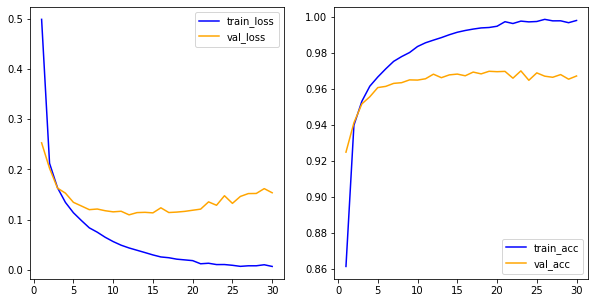

In [80]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.legend()

In [81]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1442 - acc: 0.9705


[0.14420241117477417, 0.9704999923706055]

In [82]:
results = model.predict(x_test) 

313/313 [==============================] - 0s 1ms/step


In [83]:
results.shape

(10000, 10)

In [84]:
results[0]

array([1.0941958e-10, 5.4569406e-14, 1.2470085e-10, 1.5419566e-07,
       7.4452351e-18, 4.7345510e-09, 2.6837669e-21, 9.9999982e-01,
       4.6728263e-13, 2.4335565e-09], dtype=float32)

In [85]:
np.round(results[0],4)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [86]:
np.argmax(results[0])

7

In [87]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

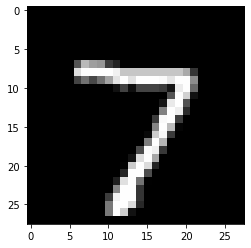

In [88]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')

In [89]:
import glob
from PIL import Image

1/1 [==============================] - 0s 14ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


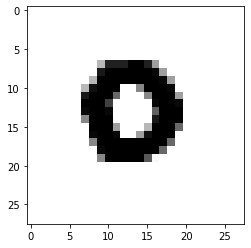

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


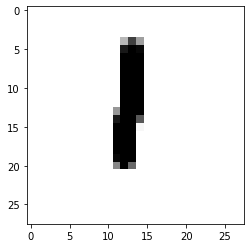

1/1 [==============================] - 0s 15ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


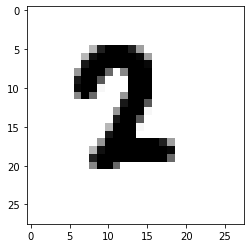

1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


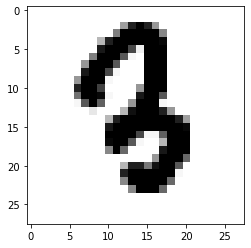

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


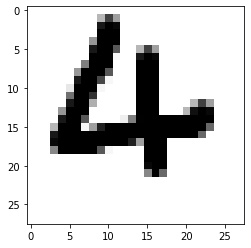

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


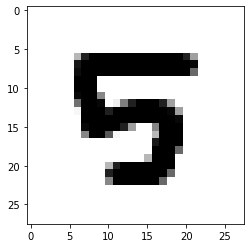

1/1 [==============================] - 0s 15ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


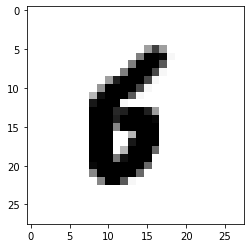

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


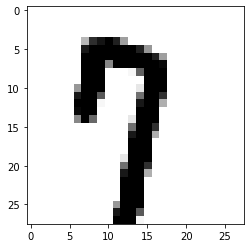

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


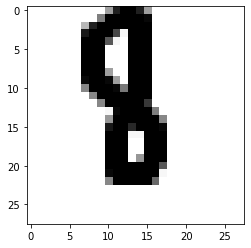

1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


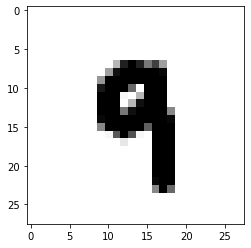

In [90]:
for path in glob.glob('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/03_mnist_img/*.png'):
    #print(path)
    img = Image.open(path).convert('L')
    # L : 흑백 이미지

    #print(img)
    plt.imshow(img,cmap='gray')
    img = np.resize(img,(1,784))
    
    #print(img)
    img = 255.0 - (img)
    
    #검은 바탕 흰 글씨
    pred = model.predict(img)
    print(pred)
    plt.show()

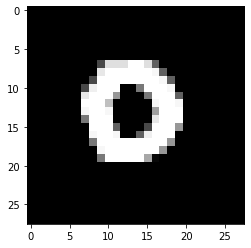

1/1 [==============================] - 0s 18ms/step
[[0.    0.    0.    0.    0.003 0.    0.    0.    0.    0.997]]
9


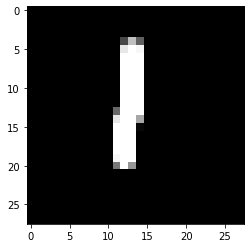

1/1 [==============================] - 0s 16ms/step
[[0.    0.988 0.    0.    0.01  0.    0.002 0.    0.    0.   ]]
1


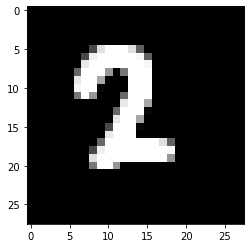

1/1 [==============================] - 0s 17ms/step
[[0.    0.    0.976 0.    0.    0.    0.    0.011 0.013 0.   ]]
2


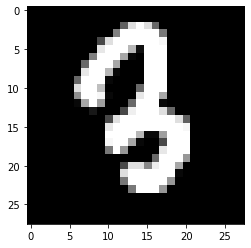

1/1 [==============================] - 0s 15ms/step
[[0.    0.    0.    0.173 0.    0.    0.002 0.    0.825 0.   ]]
8


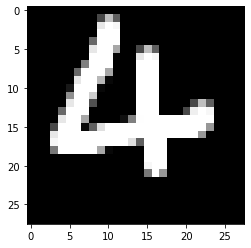

1/1 [==============================] - 0s 18ms/step
[[0.    0.    0.003 0.    0.    0.    0.997 0.    0.    0.   ]]
6


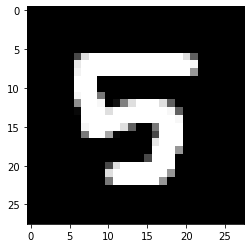

1/1 [==============================] - 0s 18ms/step
[[0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.01]]
5


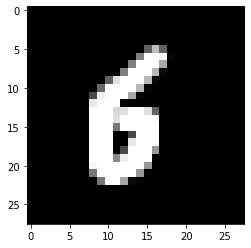

1/1 [==============================] - 0s 17ms/step
[[0.    0.    0.    0.    0.008 0.    0.952 0.    0.033 0.007]]
6


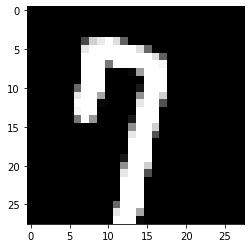

1/1 [==============================] - 0s 16ms/step
[[0.    0.    0.    0.005 0.    0.    0.    0.994 0.    0.001]]
7


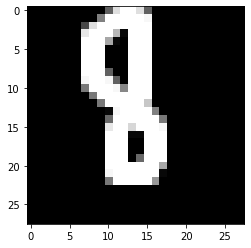

1/1 [==============================] - 0s 14ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6


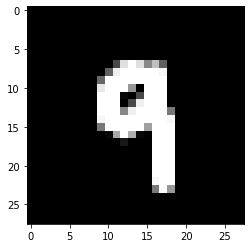

1/1 [==============================] - 0s 19ms/step
[[0.    0.    0.    0.    0.001 0.    0.    0.    0.    0.999]]
9


In [94]:
for path in glob.glob('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/03_mnist_img/*.png'):
  img = Image.open(path).convert('L')
  img = np.resize(img,(1,784))
  result = (255-img)/255
  # print(result.min(),result.max())
  plt.imshow(result.reshape(28,28),cmap='gray')
  plt.show()
  pred = model.predict(result)
  print(np.round(pred,3))
  print(np.argmax(pred))

  

In [95]:
# 모델을 파일로 저장
model.save('mnist.h5')

In [96]:
from keras.models import load_model

In [97]:
new_model = load_model('mnist.h5')

In [98]:
np.argmax(new_model.predict(x_test)[0])

313/313 [==============================] - 1s 1ms/step


7

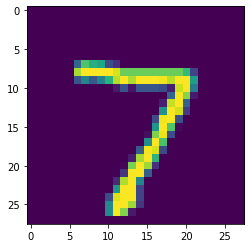

In [101]:
plt.imshow(x_test[0].reshape(28,28))

In [102]:
# 모델 가중치 저장
model.save_weights('mnist')

In [43]:
model1 = Sequential()
model1.add(Dense(64,activation='relu',input_shape=(784,)))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [44]:
model1.load_weights('mnist')

In [45]:
np.argmax(model1.predict(x_test)[0])

313/313 [==============================] - 0s 948us/step


7